In [2]:
import numpy as np 
import matplotlib as plot
import pandas as pd
import seaborn as sb
df_org=pd.read_csv("spt.csv",encoding= 'unicode-escape')

In [3]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
# Find the unique values in key

df2=df_org["key"]
df2.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

**Cleaning Dataset**

In [5]:
# Checking if there are any duplicate rows

df_org.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool>

In [6]:
# To find the total number of null values in a specific column

df_org['in_shazam_charts'].isnull().sum()

50

In [7]:
# Drop that column

df_org = df_org.drop('in_shazam_charts', axis=1)


In [8]:
# To find the total number of null values in a specific column

df_org['key'].isna().sum()

95

In [9]:
#Drop the key column due to high number of null values

df_org = df_org.drop('key', axis=1)


In [10]:
# in object type there will be comma values for writing an integer number greater than 999.

df_org['in_deezer_playlists'] = df_org['in_deezer_playlists'].str.replace(',', '', regex=True).astype('int64')


In [11]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [12]:
#Renaming the column name of artist

df_org = df_org.rename(columns={'artist(s)_name': 'artists'})

In [13]:
#Find the number of unique artist

unique_artists = df_org['artists'].unique()
len(unique_artists)

645

In [14]:
#change the stream value of particular song which is invalid

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = 211283228

In [15]:
#Checking if change has been applied

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,211283228,16,...,0,110,Major,53,75,69,7,0,17,3


In [16]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [17]:
#Change the datatype of stream from object to int

df_org['streams']=df_org['streams'].astype('int64')

In [18]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [19]:
#Checking unique tracks

unique_track = df_org['track_name'].unique()
unique_track.sort()
print(unique_track)

["'Till I Collapse" '(It Goes Like) Nanana - Edit'
 '10 Things I Hate About You' '10:35' '2 Be Loved (Am I Ready)' '2055'
 '212' '25k jacket (feat. Lil Baby)' '295' '505' '69'
 'A Holly Jolly Christmas - Single Version' 'A Tale By Quincy'
 'A Tu Merced' 'A Veces (feat. Feid)' 'ALIEN SUPERSTAR' 'AM Remix'
 'AMARGURA' 'AMERICA HAS A PROBLEM (feat. Kendrick Lamar)' 'AMG'
 'ANTIFRAGILE' 'Abcdario' 'About Damn Time' 'Acapulco' 'Acrï¿½ï¿½s'
 'Adore You' 'Afraid To Feel' 'After Dark' 'After Hours' 'After LIKE'
 'Agosto' 'Aguacero' 'Agudo Mï¿½ï¿½gi' 'Ai Preto' "Ain't Shit"
 'Ainï¿½ï¿½ï¿½t Tha' 'Alien Blues'
 'All For Us - from the HBO Original Series Euphoria'
 'All I Want for Christmas Is You' 'All My Life (feat. J. Cole)'
 'All Of The Girls You Loved Before'
 'All The Way Live (Spider-Man: Across the Spider-Verse) (Metro Boomin & Future, Lil Uzi Vert)'
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)"
 'All of Me' 'Alone' 'Am I Dreaming (Metro Boomin & A$AP Rocky, Roise

In [20]:
#Checking rows with special characters

rows_with_special_characters = df_org[df_org.astype(str).apply(lambda row: any(('ý' in cell or 'ï¿' in cell) for cell in row), axis=1)]

print("Rows with special character:")
rows_with_special_characters


Rows with special character:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,1,123,Major,69,82,76,6,0,6,3
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,38,107,Major,80,82,80,43,0,14,4
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,9,150,Major,61,39,73,37,0,11,3
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,4,130,Major,86,59,96,50,1,9,5
63,BESO,"Rauw Alejandro, ROSALï¿½",2,2023,3,24,4053,50,357925728,82,...,12,95,Minor,77,53,64,74,0,17,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,0,122,Minor,55,46,64,0,0,17,10
913,XQ Te Pones Asï¿,"Yandel, Feid",2,2022,9,13,308,0,47093942,6,...,0,92,Major,81,48,70,13,0,15,7
915,Sin Seï¿½ï,"Ovy On The Drums, Quevedo",2,2022,7,22,1097,2,209106362,18,...,1,118,Minor,82,75,85,33,1,11,4
918,THE LONELIEST,Mï¿½ï¿½ne,1,2022,10,7,1585,5,225093344,78,...,1,130,Major,52,24,60,0,0,8,3


In [21]:
#Changing the track name where there are special unreadable characters

characters_to_replace = ['ý', 'ï', '¿', 'Â', '½', 'Ã', '¯']

for char in characters_to_replace:
    df_org['track_name'] = df_org['track_name'].str.replace(char, '')

df_org.head(25)

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [22]:
#Checking rows where track_name is empty or NULL

null_track_name_rows = df_org[df_org['track_name'].isnull() | (df_org['track_name'] == '')]
print("Rows with NULL or empty track_name:")
null_track_name_rows

Rows with NULL or empty track_name:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
174,,YOASOBI,1,2023,4,12,356,16,143573775,35,...,1,166,Major,57,84,94,11,0,37,9
374,,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,0,158,Minor,60,52,76,17,0,19,5


In [23]:
#Manually changing the track name

df_org.loc[374, 'track_name'] = 'Shinunoga E-Wa'
df_org.loc[374]

track_name              Shinunoga E-Wa
artists                     Fujii Kaze
artist_count                         1
released_year                     2020
released_month                       5
released_day                        20
in_spotify_playlists               685
in_spotify_charts                   14
streams                      403097450
in_apple_playlists                  24
in_apple_charts                     94
in_deezer_playlists                  9
in_deezer_charts                     0
bpm                                158
mode                             Minor
danceability_%                      60
valence_%                           52
energy_%                            76
acousticness_%                      17
instrumentalness_%                   0
liveness_%                          19
speechiness_%                        5
Name: 374, dtype: object

In [24]:
#Manually changing the track name

df_org.loc[174, 'track_name'] = 'Run Into The Night'
df_org.loc[174]

track_name              Run Into The Night
artists                            YOASOBI
artist_count                             1
released_year                         2023
released_month                           4
released_day                            12
in_spotify_playlists                   356
in_spotify_charts                       16
streams                          143573775
in_apple_playlists                      35
in_apple_charts                        102
in_deezer_playlists                      8
in_deezer_charts                         1
bpm                                    166
mode                                 Major
danceability_%                          57
valence_%                               84
energy_%                                94
acousticness_%                          11
instrumentalness_%                       0
liveness_%                              37
speechiness_%                            9
Name: 174, dtype: object

In [25]:
#Checking artists with special characters

for char in characters_to_replace:
    char_present = df_org['artists'].str.contains(char)
    values_with_char = df_org['artists'][char_present]
    if not values_with_char.empty:
        print(f"Values with '{char}' in artist_name column:")
        print(values_with_char)

Values with 'ï' in artist_name column:
26                                   Rï¿½ï¿½ma, Selena G
63                              Rauw Alejandro, ROSALï¿½
112                            Jasiel Nuï¿½ï¿½ez, Peso P
118               Sebastian Yatra, Manuel Turizo, Beï¿½ï
146                            Bomba Estï¿½ï¿½reo, Bad B
210                                Junior H, Eden Muï¿½ï
212                                 Semicenk, Doï¿½ï¿½u 
231                                             Beyoncï¿
236                             Kendrick Lamar, Beyoncï¿
249                                 Zï¿½ï¿½ Neto & Crist
258                                 Rich The Kid, Matuï¿
278                                             ROSALï¿½
294                            Jasiel Nuï¿½ï¿½ez, Peso P
303                                  Tiï¿½ï¿½sto, Tate M
309                                   Marï¿½ï¿½lia Mendo
375                             Wisin & Yandel, ROSALï¿½
380                                             R

In [26]:
#Replacing special characters in artist name with #

for char in characters_to_replace:
    df_org['artists'] = df_org['artists'].str.replace(char, '#')

df_org.head(30)

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [27]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [28]:
df_org.count

<bound method DataFrame.count of                               track_name             artists  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_m

In [29]:
df_org


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [30]:
df_org['track_name'].count()

953

In [31]:
a=df_org.track_name.unique()
len(a)

943

DuplicateElements

In [32]:
#find the duplicate from orginal data
duplicate = df_org[df_org.duplicated(['track_name'])]
duplicate

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,16,148,Major,47,15,52,38,13,29,5
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,0,143,Major,60,86,32,88,0,34,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,0,166,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,0,121,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,21,109,Minor,84,72,74,10,0,34,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,...,1,138,Major,70,31,44,84,0,9,39
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,...,0,146,Major,69,63,45,48,0,18,4
852,Numb,"Marshmello, Khalid",2,2022,6,10,3879,2,295307001,107,...,1,120,Minor,91,63,77,12,1,10,5
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,0,170,Major,56,52,64,11,0,45,7
922,Miss You,Southstar,1,1982,5,16,2020,0,154356956,77,...,0,145,Major,66,24,58,17,0,19,5


In [33]:
#Drop duplicate elements from original data
df_org.drop_duplicates(subset='track_name')

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [34]:
df_org.to_csv('sheet.csv')

In [35]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          953 non-null    int64
 1   released_year         953 non-null    int64
 2   released_month        953 non-null    int64
 3   released_day          953 non-null    int64
 4   in_spotify_playlists  953 non-null    int64
 5   in_spotify_charts     953 non-null    int64
 6   streams               953 non-null    int64
 7   in_apple_playlists    953 non-null    int64
 8   in_apple_charts       953 non-null    int64
 9   in_deezer_playlists   953 non-null    int64
 10  in_deezer_charts      953 non-null    int64
 11  bpm                   953 non-null    int64
 12  danceability_%        953 non-null    int64
 13  valence_%             953 non-null    int64
 14  energy_%              953 non-null    int64
 15  acousticness_%        953 non-null    int64
 16  instrume

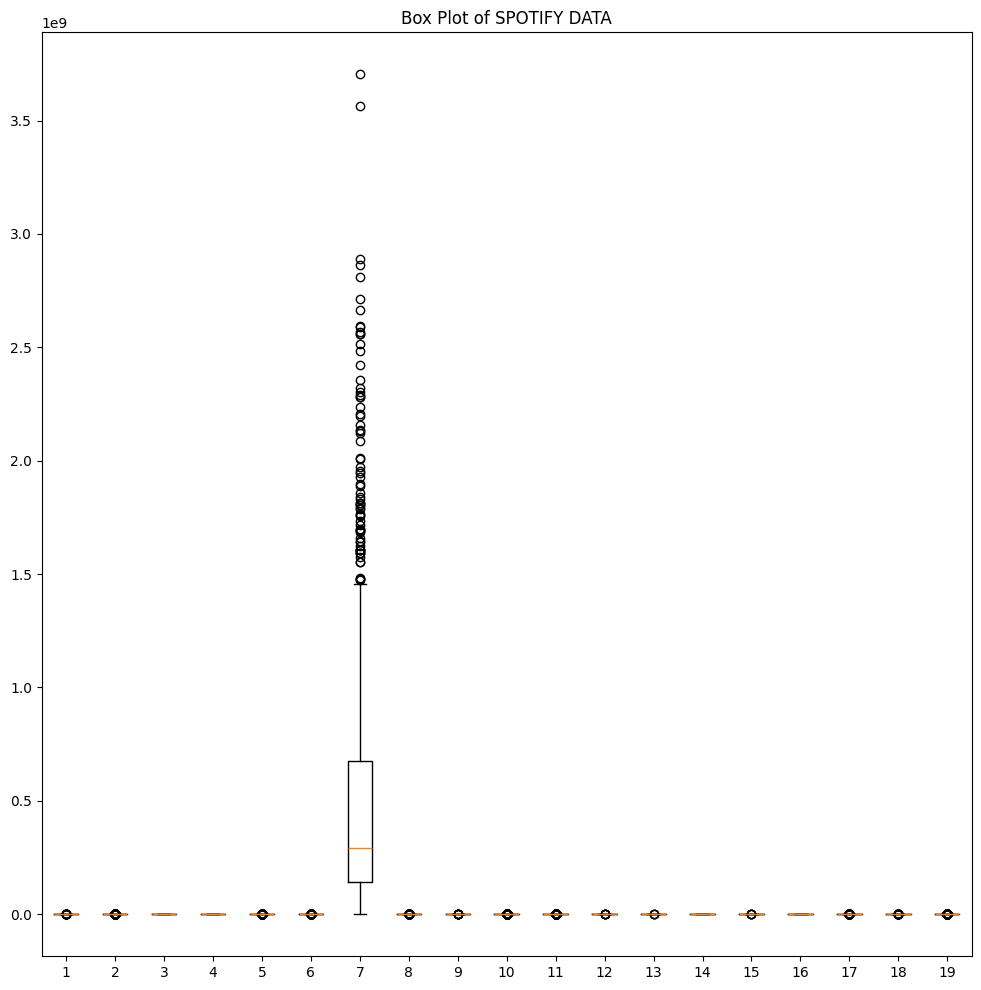

In [36]:
# We cannot use the non numeric value while plotting the boxplot so droping them and creating a new sub df

import matplotlib.pyplot as plt

columns_todrp=['track_name','artists','mode']

out_check=df_org.drop(columns=columns_todrp)

out_check.info()

plt.figure(figsize=(12, 12))
plt.title('Box Plot of SPOTIFY DATA')
plt.boxplot(out_check)
plt.show()